In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
import joblib

In [2]:
loan_details=pd.read_csv("Loan_States_1.csv")
loan_details.head()

,id,Name,current_age,gender,address,income,yearly_income,credit_score,loan_states
0,1,Meena,64,Female,"Street 286, Indore, Madhya Pradesh - 452645",86125,1033501,715,0
1,2,Kavya,39,Female,"Street 268, Kolkata, West Bengal - 700555",68414,820965,834,1
2,3,Meena,50,Female,"Street 262, Lucknow, Uttar Pradesh - 226797",22595,271138,609,0
3,4,Sanjay,27,Male,"Street 265, Nagpur, Maharashtra - 440623",24158,289898,782,0
4,5,Sai,45,Other,"Street 157, Delhi, Delhi - 110965",45475,545697,608,0


In [3]:
loan_details.shape
loan_details.info()
loan_details.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4999 non-null   int64 
 1   Name           4999 non-null   object
 2   current_age    4999 non-null   int64 
 3   gender         4999 non-null   object
 4   address        4999 non-null   object
 5   income         4999 non-null   int64 
 6   yearly_income  4999 non-null   int64 
 7   credit_score   4999 non-null   int64 
 8   loan_states    4999 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.6+ KB


id               0
Name             0
current_age      0
gender           0
address          0
income           0
yearly_income    0
credit_score     0
loan_states      0
dtype: int64

In [4]:
LE=LabelEncoder()
loan_details['gender']=LE.fit_transform(loan_details['gender'])
loan_details[["gender"]].head()

,gender
0,0
1,0
2,0
3,1
4,2


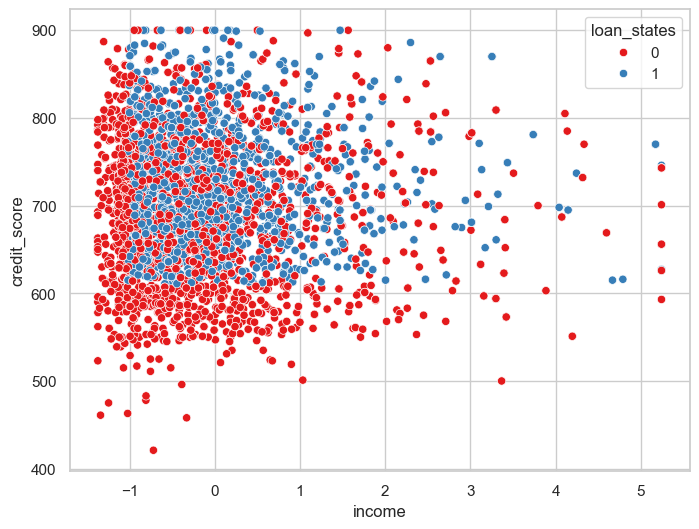

In [12]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=loan_details,
    x="income",
    y="credit_score",
    hue="loan_states",
    palette="Set1")
plt.show()

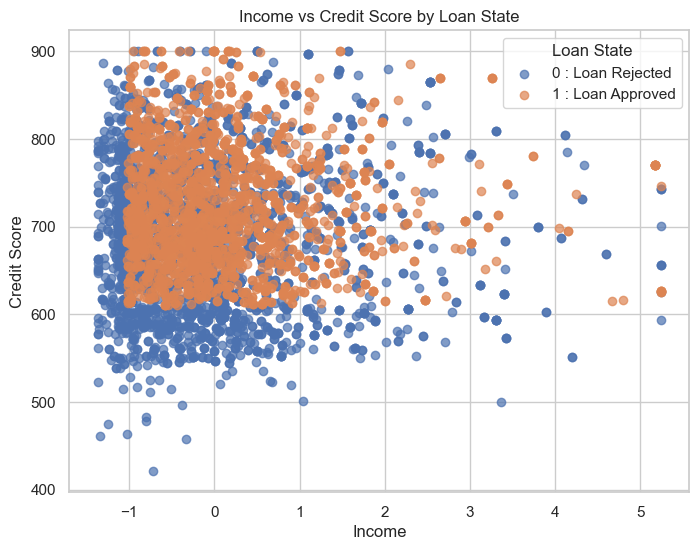

In [14]:

approved = loan_details[loan_details["loan_states"] == 1]
rejected = loan_details[loan_details["loan_states"] == 0]
plt.figure(figsize=(8,6))
plt.scatter(
    rejected["income"],
    rejected["credit_score"],
    label="0 : Loan Rejected",
    alpha=0.7
)
plt.scatter(
    approved["income"],
    approved["credit_score"],
    label="1 : Loan Approved",
    alpha=0.7
)
plt.xlabel("Income")
plt.ylabel("Credit Score")
plt.title("Income vs Credit Score by Loan State")
plt.legend(title="Loan State")

plt.show()

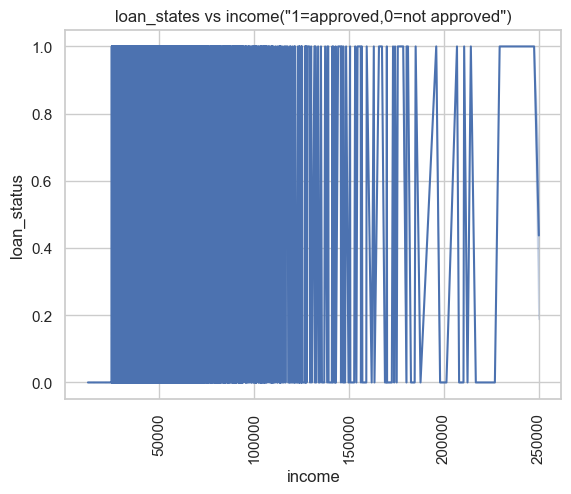

In [6]:
For_visualizing=loan_details.head(5)
sns.lineplot(x='income',y='loan_states', data=loan_details)
plt.title('loan_states vs income("1=approved,0=not approved")')
plt.xlabel('income')
plt.xticks(rotation=90)
plt.ylabel('loan_status')
plt.show()

In [7]:
x = loan_details[['income','credit_score']]
y = loan_details["loan_states"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
scaler = StandardScaler()
loan_details[["income","yearly_income"]]=scaler.fit_transform(loan_details[["income",'yearly_income']])
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
loan_details.head()

,id,Name,current_age,gender,address,income,yearly_income,credit_score,loan_states
0,1,Meena,64,0,"Street 286, Indore, Madhya Pradesh - 452645",0.678572,0.678575,715,0
1,2,Kavya,39,0,"Street 268, Kolkata, West Bengal - 700555",0.185154,0.185147,834,1
2,3,Meena,50,0,"Street 262, Lucknow, Uttar Pradesh - 226797",-1.091337,-1.091342,609,0
3,4,Sanjay,27,1,"Street 265, Nagpur, Maharashtra - 440623",-1.047792,-1.047788,782,0
4,5,Sai,45,2,"Street 157, Delhi, Delhi - 110965",-0.453913,-0.453920,608,0


In [10]:
model = RandomForestClassifier(
    n_estimators=600,          
    max_depth=18,               
    min_samples_split=10,      
    min_samples_leaf=5,        
    max_features='sqrt',      
    class_weight='balanced',   
    random_state=42,
    n_jobs=-1
)

model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_predict))
print("Confusion Matrix:\n", classification_report(y_test, y_predict))

accuracy: 0.741
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74       584
           1       0.63      0.89      0.74       416

    accuracy                           0.74      1000
   macro avg       0.76      0.76      0.74      1000
weighted avg       0.78      0.74      0.74      1000



In [11]:
joblib.dump(model, "loan_model.pkl")

['loan_model.pkl']